In [1]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import sklearn
import pandas
import matplotlib.pyplot as plt

In [2]:
dfRaw = pandas.read_csv('contactid_08_01_18download.csv', encoding="utf-8")

In [3]:
dfRaw

,Subject.Id,Contact.ID,cat,svy_contact,empstatus,jailprison,close,baseline_flag,dup,reinstall_flag1,...,Number of outgoing calls at night,Any night incoming call,Any night outgoing call,Min days between calls,Max days between calls,Total number of texts,Any night text,Number of texts at night,Min days between texts,Max days between texts
0,1003,a0000022d8b566-1485854260,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,32.0,1.0,17.0,1.0,4.0
1,1003,a0000022d8b566-4428755,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,21.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,1003,a0000022d8b566-682408058,Phone survey,Person,Working Formally,0.0,60.0,1.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,4.0,0.0,0.0,NaN,NaN
3,1003,a0000022d8b5661085053215,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
4,1003,a0000022d8b5661306093745,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,1.0,1.0,1.0,NaN,NaN,5.0,1.0,1.0,2.0,3.0
5,1003,a0000022d8b5661374658182,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
6,1003,a0000022d8b5662119192337,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,302.0,1.0,128.0,1.0,1.0
7,1003,a0000022d8b5662120103081,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN
8,1003,a0000022d8b566439263804,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,16.0,1.0,3.0,1.0,1.0
9,1003,a0000022d8b566691081474,No phone survey,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,2.0,0.0,1.0,NaN,NaN,266.0,1.0,54.0,1.0,2.0


In [4]:
dfclean = dfRaw.loc[dfRaw['close'].notnull()]

In [5]:
dfclean

,Subject.Id,Contact.ID,cat,svy_contact,empstatus,jailprison,close,baseline_flag,dup,reinstall_flag1,...,Number of outgoing calls at night,Any night incoming call,Any night outgoing call,Min days between calls,Max days between calls,Total number of texts,Any night text,Number of texts at night,Min days between texts,Max days between texts
2,1003,a0000022d8b566-682408058,Phone survey,Person,Working Formally,0.0,60.0,1.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,4.0,0.0,0.0,NaN,NaN
17,1004,a0000022aa5cd6-212065659,Phone survey,Person,Working Formally,0.0,100.0,0.0,0.0,1.0,...,0.0,0.0,0.0,NaN,NaN,2.0,0.0,0.0,NaN,NaN
24,1004,a0000022aa5cd61447330108,Phone survey,Person,Not Working,0.0,100.0,0.0,1.0,1.0,...,4.0,1.0,1.0,2.0,2.0,14.0,1.0,12.0,1.0,4.0
28,1004,a0000022aa5cd62103159229,Phone survey,Person,NaN,1.0,55.0,0.0,0.0,1.0,...,5.0,0.0,1.0,1.0,3.0,2.0,1.0,2.0,NaN,NaN
33,1004,a0000022aa5cd6846559228,Phone survey,Person,Working Informally,1.0,100.0,0.0,1.0,1.0,...,11.0,1.0,1.0,1.0,7.0,7.0,1.0,2.0,NaN,NaN
36,1004,a0000022d95d9b-1043125280,Phone survey,Person,Not Working,0.0,100.0,0.0,1.0,1.0,...,0.0,0.0,0.0,3.0,3.0,1.0,0.0,0.0,NaN,NaN
46,1004,a0000022d95d9b-879869607,Phone survey,Person,Self-employed,0.0,100.0,0.0,0.0,1.0,...,0.0,0.0,0.0,NaN,NaN,3.0,1.0,1.0,34.0,34.0
52,1004,a0000022d95d9b17610566,Phone survey,Person,Not Working,0.0,100.0,0.0,0.0,1.0,...,3.0,0.0,1.0,NaN,NaN,3.0,1.0,1.0,5.0,5.0
61,1004,a0000022d95d9b846559228,Phone survey,Person,Working Informally,1.0,100.0,0.0,0.0,1.0,...,9.0,1.0,1.0,1.0,15.0,5.0,1.0,2.0,2.0,33.0
67,1005,a0000022aa2754-765626467,Phone survey,Person,Working Formally,1.0,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,7.0,1.0,0.0,0.0,NaN,NaN


In [6]:
dfclean.shape[0]


2869

In [7]:
dfcleanX = dfclean.fillna(-1)

In [8]:
dfcleanX

,Subject.Id,Contact.ID,cat,svy_contact,empstatus,jailprison,close,baseline_flag,dup,reinstall_flag1,...,Number of outgoing calls at night,Any night incoming call,Any night outgoing call,Min days between calls,Max days between calls,Total number of texts,Any night text,Number of texts at night,Min days between texts,Max days between texts
2,1003,a0000022d8b566-682408058,Phone survey,Person,Working Formally,0.0,60.0,1.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,-1.0,4.0,0.0,0.0,-1.0,-1.0
17,1004,a0000022aa5cd6-212065659,Phone survey,Person,Working Formally,0.0,100.0,0.0,0.0,1.0,...,0.0,0.0,0.0,-1.0,-1.0,2.0,0.0,0.0,-1.0,-1.0
24,1004,a0000022aa5cd61447330108,Phone survey,Person,Not Working,0.0,100.0,0.0,1.0,1.0,...,4.0,1.0,1.0,2.0,2.0,14.0,1.0,12.0,1.0,4.0
28,1004,a0000022aa5cd62103159229,Phone survey,Person,-1,1.0,55.0,0.0,0.0,1.0,...,5.0,0.0,1.0,1.0,3.0,2.0,1.0,2.0,-1.0,-1.0
33,1004,a0000022aa5cd6846559228,Phone survey,Person,Working Informally,1.0,100.0,0.0,1.0,1.0,...,11.0,1.0,1.0,1.0,7.0,7.0,1.0,2.0,-1.0,-1.0
36,1004,a0000022d95d9b-1043125280,Phone survey,Person,Not Working,0.0,100.0,0.0,1.0,1.0,...,0.0,0.0,0.0,3.0,3.0,1.0,0.0,0.0,-1.0,-1.0
46,1004,a0000022d95d9b-879869607,Phone survey,Person,Self-employed,0.0,100.0,0.0,0.0,1.0,...,0.0,0.0,0.0,-1.0,-1.0,3.0,1.0,1.0,34.0,34.0
52,1004,a0000022d95d9b17610566,Phone survey,Person,Not Working,0.0,100.0,0.0,0.0,1.0,...,3.0,0.0,1.0,-1.0,-1.0,3.0,1.0,1.0,5.0,5.0
61,1004,a0000022d95d9b846559228,Phone survey,Person,Working Informally,1.0,100.0,0.0,0.0,1.0,...,9.0,1.0,1.0,1.0,15.0,5.0,1.0,2.0,2.0,33.0
67,1005,a0000022aa2754-765626467,Phone survey,Person,Working Formally,1.0,100.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,7.0,1.0,0.0,0.0,-1.0,-1.0


In [9]:
xdata = dfcleanX[['Total number of calls',
'Total duration of calls',
'Total incoming calls',
'Total outgoing calls',
'Total number of missed calls',
'Total number of incoming calls, excluding missed',
'Proportion of incoming calls answered',
'Proportion of calls incoming',
'Duration of incoming calls',
'Duration of outgoing calls',
'Total number of night calls',
'Any night call',
'Number of incoming calls at night',
'Number of outgoing calls at night',
'Any night incoming call',
'Any night outgoing call',
'Min days between calls',
'Max days between calls',
'Total number of texts',
'Any night text',
'Number of texts at night',
'Min days between texts',
'Max days between texts']].values 

In [10]:
xdata

array([[ 5.000e+00,  8.500e+01,  3.000e+00, ...,  0.000e+00, -1.000e+00,
        -1.000e+00],
       [ 1.000e+00,  2.500e+01,  0.000e+00, ...,  0.000e+00, -1.000e+00,
        -1.000e+00],
       [ 6.000e+00,  2.610e+02,  2.000e+00, ...,  1.200e+01,  1.000e+00,
         4.000e+00],
       ...,
       [ 8.000e+00,  1.437e+03,  3.000e+00, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 5.000e+00,  4.970e+02,  1.000e+00, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 6.000e+00,  2.431e+03,  4.000e+00, ..., -1.000e+00, -1.000e+00,
        -1.000e+00]])

In [11]:
x = (dfcleanX.shape[0]) * .8

In [12]:
x

2295.2000000000003

In [13]:
int(x)

2295

In [14]:
xtrain = xdata[:2295]

In [15]:
xtrain


array([[ 5.000e+00,  8.500e+01,  3.000e+00, ...,  0.000e+00, -1.000e+00,
        -1.000e+00],
       [ 1.000e+00,  2.500e+01,  0.000e+00, ...,  0.000e+00, -1.000e+00,
        -1.000e+00],
       [ 6.000e+00,  2.610e+02,  2.000e+00, ...,  1.200e+01,  1.000e+00,
         4.000e+00],
       ...,
       [ 1.000e+01,  6.790e+02,  1.000e+01, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 3.500e+01,  6.892e+03,  2.200e+01, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 7.000e+00,  1.500e+02,  2.000e+00, ..., -1.000e+00, -1.000e+00,
        -1.000e+00]])

In [44]:
xtrain.shape


(2295, 23)

In [45]:
xtest = xdata[2296:]

In [46]:
xtest

array([[ 4.000e+01,  5.188e+03,  1.300e+01, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 1.000e+00,  3.490e+03,  1.000e+00, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 2.000e+00,  7.000e+01,  1.000e+00, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       ...,
       [ 8.000e+00,  1.437e+03,  3.000e+00, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 5.000e+00,  4.970e+02,  1.000e+00, ..., -1.000e+00, -1.000e+00,
        -1.000e+00],
       [ 6.000e+00,  2.431e+03,  4.000e+00, ..., -1.000e+00, -1.000e+00,
        -1.000e+00]])

In [47]:
# ravel creates 1d array
y = dfclean[['close']].values.ravel()

In [48]:
ytrain = y[:2295]

In [49]:
ytrain
ytrain.shape

(2295,)

In [66]:
def transform(ytrain):
    if ytrain < 33:
        return 0
    if ytrain < 66:
        return 1
    if ytrain < 100:
        return 2
    return 3

ytrainClassifier = [transform(i) for i in ytrain]

In [67]:
ytest = y[2296:]

In [68]:
ytest
ytest.shape

(573,)

In [69]:
xtrain.shape,ytrain.shape

((2295, 23), (2295,))

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier().fit(xtrain,ytrainClassifier)


In [71]:
yhatClassifier = classifier.predict(xtrain)

In [72]:
yhatClassifier

array([3, 3, 3, ..., 3, 3, 3])

In [73]:
accuracy_score(ytrainClassifier, yhatClassifier)

0.629193899782135

In [74]:
from sklearn import svm
regressor = svm.SVR()
regressor.fit(xtrain,ytrain)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [75]:
yhatRegressor = regressor.predict(xtrain)

In [76]:
yhatRegressor

array([97.54253452, 99.03195241, 99.7413209 , ..., 99.7413209 ,
       99.7413209 , 97.7413209 ])

In [80]:
mean_squared_error(ytrain, yhatRegressor)

1318.5601892110558

In [ ]:
plt.plot(x,y)

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

ABCclf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(ABCclf, xtrain, ytrain)
scores.mean()

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.3004320568723763

In [ ]:
#plot error on train data
#plot error on test data

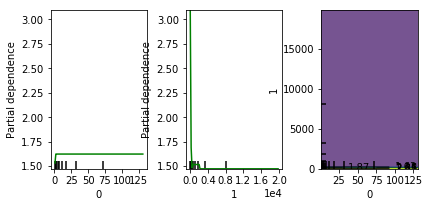

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence

GBCclf = GradientBoostingClassifier(n_estimators=20).fit(xtrain,ytrain)
features = [0, 1, (0, 1)]
fig, axs = plot_partial_dependence(GBC, xtrain, features, label=0) 

In [82]:
yhatRegressor = regressor.predict(xdata)

In [88]:
yhatRegressor.shape

(2869,)

In [92]:
dfRaw['Predicted Closeness'] = yhatRegressor

ValueError: Length of values does not match length of index

In [85]:
dfPredict = dfRaw.assign('Predicted Closeness' = yhatRegressor)

SyntaxError: keyword can't be an expression (<ipython-input-85-cc33e5a3c82c>, line 1)

In [ ]:
dfRaw = pandas.to_csv('contactid_08_01_18Predictions.csv', encoding="utf-8")